In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import random
import scipy.special

## Fare finta di usare la formula giusta

In [2]:
lam = 500 * 10^(-9)
a = 2 * 10^(-9)
k = 2*mt.pi/lam

In [3]:
thetas = np.array([])
z = np.array([])
I = np.array([])

In [4]:
for i in range (50000):
    theta = random.uniform(0, mt.pi)
    thetas = np.append(thetas,theta)

In [5]:
for theta in thetas:
    z = np.append(z, k * a * mt.sin(theta))

In [6]:
J1 = scipy.special.jv(1,z)

In [7]:
for i in range(50000):
    I = np.append(I, 5*(2 * J1[i] / z[i])**2)

## Inizio esercizio vero e proprio

In [2]:
with open('gauss', 'r') as f:
    list_num = f. read().splitlines()
    
list_arr = np.asarray(list_num)
list_arr = list_arr.astype(np.float)

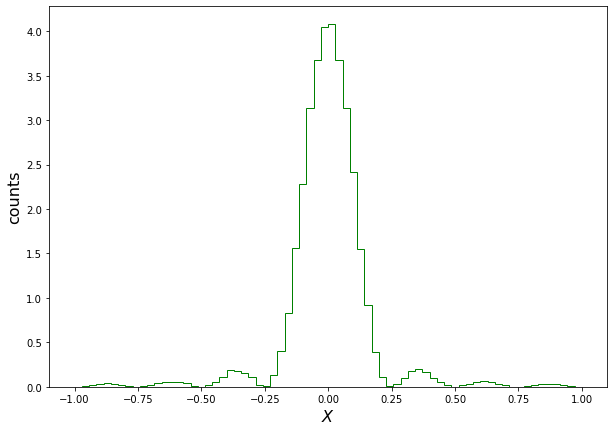

In [3]:
fig = plt.figure(figsize=(10,7))
plt.hist(list_arr, bins=70, density = True, fill = False, ec = 'green', range=(-1,1), histtype='step')
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.show()

# smearing

In [4]:
c = 0.4
sigma = c * 0.03

In [5]:
smear04 = np.array([])

In [6]:
for j in range (50000):
    mean = list_arr[j]
    new = random.gauss(mean,sigma)
    smear04 = np.append(smear04, new)

In [7]:
c = 0.9
sigma = c * 0.03

In [8]:
smear09 = np.array([])

In [9]:
for j in range (50000):
    mean = list_arr[j]
    new = random.gauss(mean,sigma)
    smear09 = np.append(smear09, new)

In [10]:
c = 2
sigma = c * 0.03

In [11]:
smearTANTO = np.array([])

In [12]:
for j in range (50000):
    mean = list_arr[j]
    new = random.gauss(mean,sigma)
    smearTANTO = np.append(smearTANTO, new)

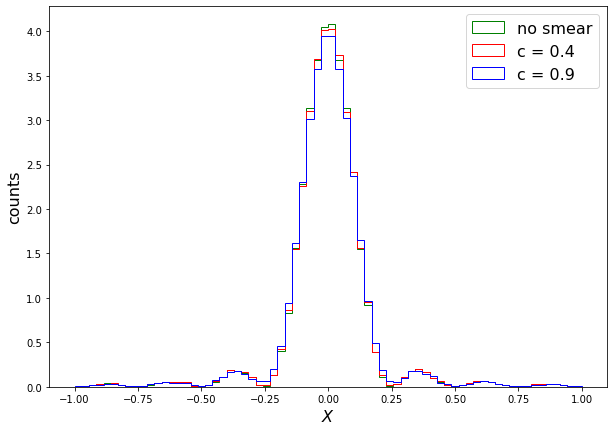

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.hist(list_arr, bins=70, density = True, fill = False, ec = 'green', range=(-1,1), label = 'no smear', histtype='step')
plt.hist(smear04, bins=70, density = True, fill = False, ec = 'red', range=(-1,1), label = 'c = 0.4', histtype='step')
plt.hist(smear09, bins=70, density = True, fill = False, ec = 'blue', range=(-1,1), label = 'c = 0.9', histtype='step')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.show()

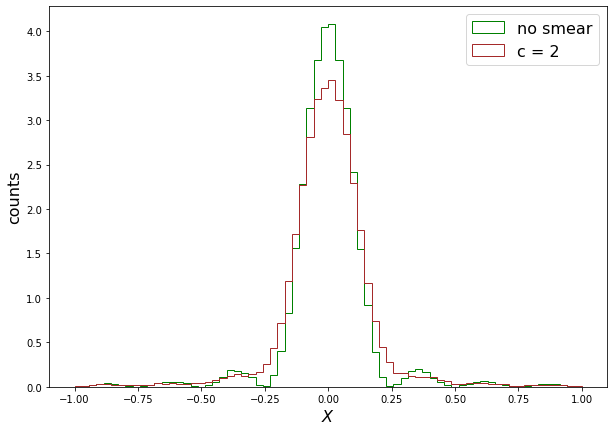

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.hist(list_arr, bins=70, density = True, fill = False, ec = 'green', range=(-1,1), label = 'no smear', histtype='step')
plt.hist(smearTANTO, bins=70, density = True, fill = False, ec = 'brown', range=(-1,1), label = 'c = 2', histtype='step')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.show()

## unfolding

In [16]:
from pyunfold import iterative_unfold

In [17]:
true_samples = list_arr
data_true, _ = np.histogram(list_arr, bins = 70)

In [18]:
observed_samples = smear09
data_observed, _ = np.histogram(smear09, bins = 70)
data_observed_err = np.sqrt(data_observed)

In [22]:
num_bins=70

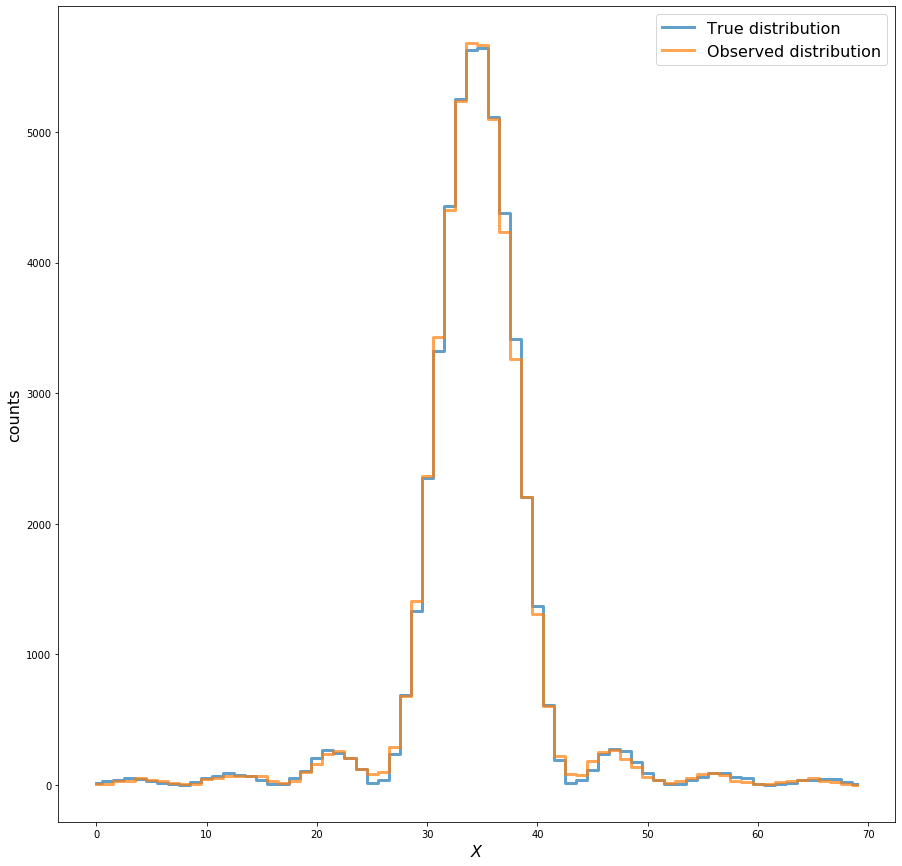

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
ax.step(np.arange(num_bins), data_true, where='mid', lw=3, alpha=0.7, label='True distribution')
ax.step(np.arange(num_bins), data_observed, where='mid', lw=3, alpha=0.7, label='Observed distribution')
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [31]:
efficiencies = np.ones_like(data_observed, dtype=float)
efficiencies_err = np.full_like(efficiencies, 0.01, dtype=float)

In [32]:
response_hist, _, _ = np.histogram2d(observed_samples, true_samples, bins=70)
response_hist_err = np.sqrt(response_hist)

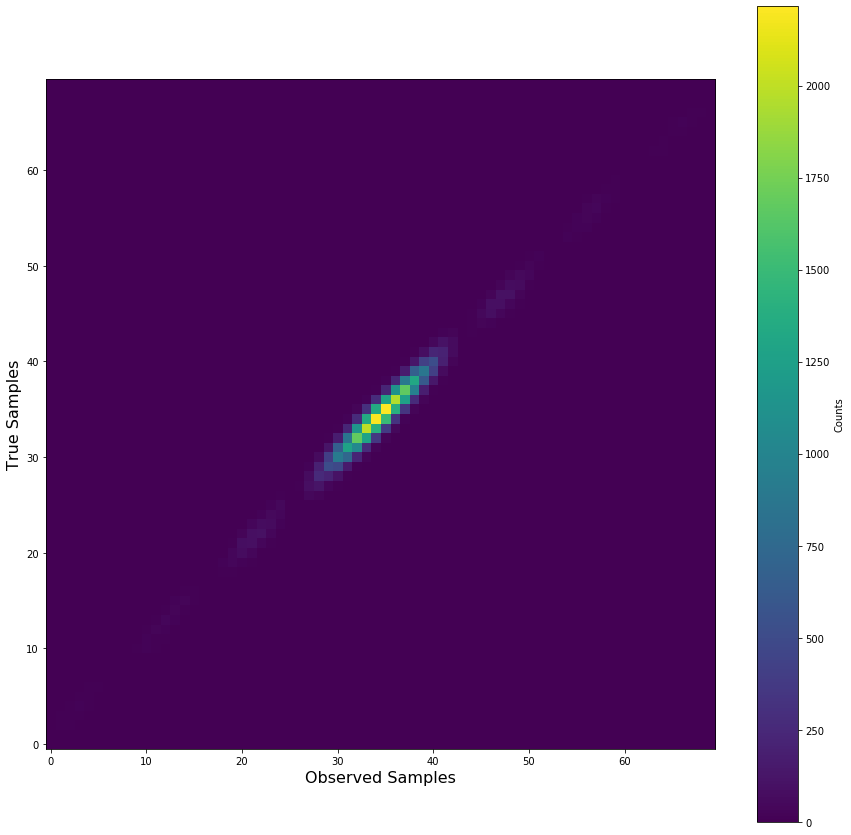

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(response_hist, origin='lower')
cbar = plt.colorbar(im, label='Counts')
plt.xlabel('Observed Samples', fontsize=16)
plt.ylabel('True Samples', fontsize=16)
plt.show()

In [37]:
column_sums = response_hist.sum(axis=0)
normalization_factor = efficiencies / column_sums

In [38]:
response = response_hist * normalization_factor
response_err = response_hist_err * normalization_factor

In [39]:
response.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

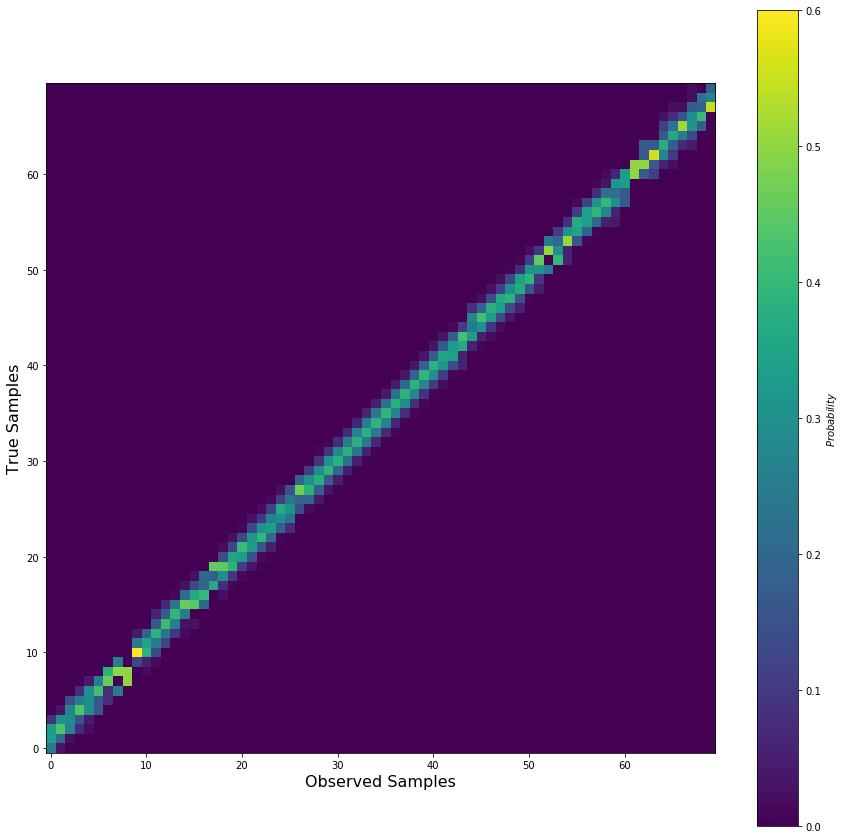

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(response, origin='lower')
cbar = plt.colorbar(im, label='$Probability$')
plt.xlabel('Observed Samples', fontsize=16)
plt.ylabel('True Samples', fontsize=16)
plt.show()

In [42]:
from pyunfold import callbacks

In [43]:
logger = callbacks.Logger()

In [44]:
regularizer = callbacks.SplineRegularizer(smooth=0.95)

In [45]:
unfolded_results = iterative_unfold(data=data_observed,
                                    data_err=data_observed_err,
                                    response=response,
                                    response_err=response_err,
                                    efficiencies=efficiencies,
                                    efficiencies_err=efficiencies_err,
                                    ts = 'rmd',
                                    callbacks=[logger, regularizer]
    )

Iteration 1: ts = 0.9771, ts_stopping = 0.01
Iteration 2: ts = 0.3730, ts_stopping = 0.01
Iteration 3: ts = 0.1808, ts_stopping = 0.01
Iteration 4: ts = 0.1105, ts_stopping = 0.01
Iteration 5: ts = 0.0674, ts_stopping = 0.01
Iteration 6: ts = 0.0487, ts_stopping = 0.01
Iteration 7: ts = 0.0984, ts_stopping = 0.01
Iteration 8: ts = 0.0419, ts_stopping = 0.01
Iteration 9: ts = 0.0475, ts_stopping = 0.01
Iteration 10: ts = 0.0382, ts_stopping = 0.01
Iteration 11: ts = 0.0319, ts_stopping = 0.01


/home/bpinolin/projupy/jup-env/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Iteration 12: ts = 0.1063, ts_stopping = 0.01
Iteration 13: ts = 0.0244, ts_stopping = 0.01
Iteration 14: ts = 0.0215, ts_stopping = 0.01
Iteration 15: ts = 0.0843, ts_stopping = 0.01
Iteration 16: ts = 0.0113, ts_stopping = 0.01
Iteration 17: ts = 0.1915, ts_stopping = 0.01
Iteration 18: ts = 0.1098, ts_stopping = 0.01
Iteration 19: ts = 0.0940, ts_stopping = 0.01
Iteration 20: ts = 0.0863, ts_stopping = 0.01
Iteration 21: ts = 0.0793, ts_stopping = 0.01
Iteration 22: ts = 0.0731, ts_stopping = 0.01
Iteration 23: ts = 0.0813, ts_stopping = 0.01
Iteration 24: ts = 0.0620, ts_stopping = 0.01
Iteration 25: ts = 0.0592, ts_stopping = 0.01
Iteration 26: ts = 0.0521, ts_stopping = 0.01
Iteration 27: ts = 0.0565, ts_stopping = 0.01
Iteration 28: ts = 0.0451, ts_stopping = 0.01
Iteration 29: ts = 0.0419, ts_stopping = 0.01
Iteration 30: ts = 0.0391, ts_stopping = 0.01
Iteration 31: ts = 0.0365, ts_stopping = 0.01
Iteration 32: ts = 0.0963, ts_stopping = 0.01
Iteration 33: ts = 0.0897, ts_stop

In [46]:
unfolded_results.keys()

dict_keys(['unfolded', 'stat_err', 'sys_err', 'num_iterations', 'unfolding_matrix', 'ts_iter', 'ts_stopping'])

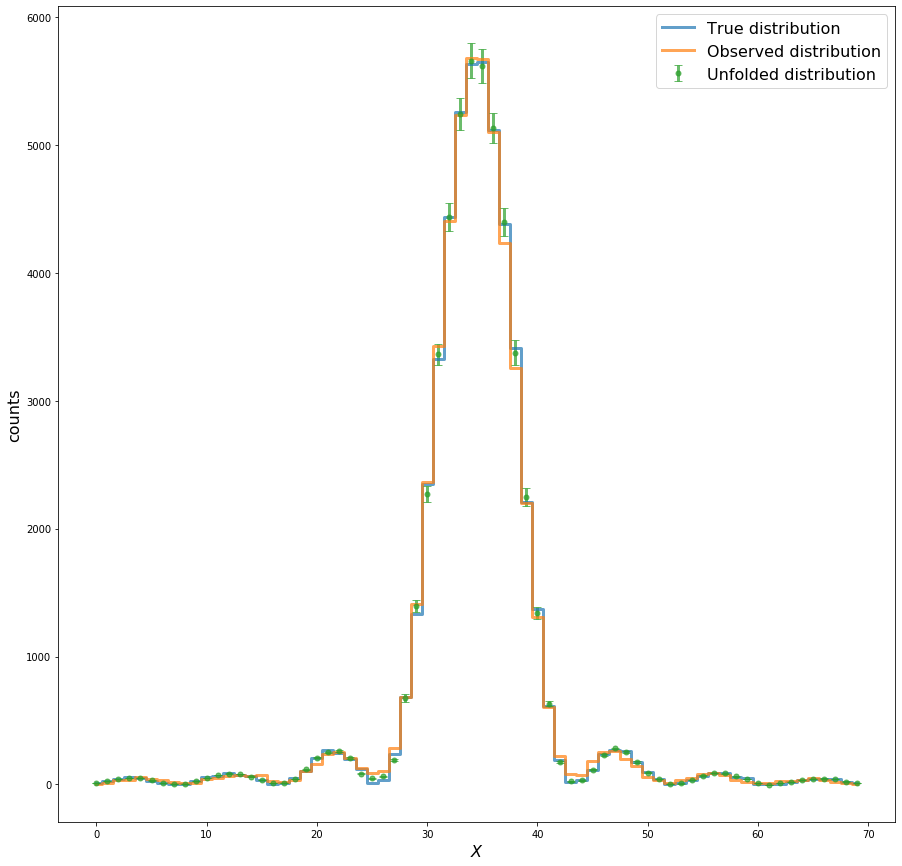

In [47]:
num_bins = 70
fig, ax = plt.subplots(figsize=(15, 15))
ax.step(np.arange(num_bins), data_true, where='mid', lw=3, alpha=0.7, label='True distribution')
ax.step(np.arange(num_bins), data_observed, where='mid', lw=3, alpha=0.7, label='Observed distribution')
ax.errorbar(np.arange(num_bins), unfolded_results['unfolded'],
            yerr=unfolded_results['sys_err'],
            alpha=0.7,
            elinewidth=3,
            capsize=4,
            ls='None', marker='.', ms=10,
            label='Unfolded distribution')
plt.xlabel('$X$', fontsize=16)
plt.ylabel('counts', fontsize=16)
ax.legend(fontsize=16)
plt.show()